In [1]:
from __future__ import division
import turicreate
import math
import string

In [2]:
weather = turicreate.SFrame.read_csv('indian_summer.csv/')

Finished parsing file /home/jovyan/work/Weather_Prediction/indian_summer.csv

Parsing completed. Parsed 100 lines in 0.106848 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,str,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jovyan/work/Weather_Prediction/indian_summer.csv

Parsing completed. Parsed 13650 lines in 0.070608 secs.

In [3]:
weather

City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed
New Delhi,01-04-2021,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.6,22.8
New Delhi,02-04-2021,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4
New Delhi,03-04-2021,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5
New Delhi,04-04-2021,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.0,18.3
New Delhi,05-04-2021,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5
New Delhi,06-04-2021,38.0,22.6,30.4,37.2,22.6,29.5,10.2,30.51,14.8
New Delhi,07-04-2021,36.0,23.4,29.6,34.6,23.4,28.7,9.7,31.69,18.4
New Delhi,08-04-2021,34.9,20.9,27.6,32.6,20.9,26.7,4.4,26.47,15.9
New Delhi,09-04-2021,36.2,17.1,27.7,33.7,17.1,26.6,3.6,25.64,18.4
New Delhi,10-04-2021,36.9,19.4,28.9,34.7,19.4,27.8,3.8,23.01,16.6


In [4]:
data = weather[weather['City']== 'Lucknow']

In [5]:
data

City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed
Lucknow,01-04-2021,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7
Lucknow,02-04-2021,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6
Lucknow,03-04-2021,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0
Lucknow,04-04-2021,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.8,18.4
Lucknow,05-04-2021,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.8,9.4
Lucknow,06-04-2021,39.0,22.6,30.9,39.0,22.6,30.7,14.1,37.77,14.8
Lucknow,07-04-2021,38.0,26.0,31.3,40.4,26.0,32.7,18.4,47.66,14.8
Lucknow,08-04-2021,38.3,23.8,30.7,37.7,23.8,30.5,15.6,45.6,16.6
Lucknow,09-04-2021,37.0,22.0,30.4,34.7,22.0,29.1,8.7,27.71,14.8
Lucknow,10-04-2021,38.6,20.6,29.6,36.3,20.6,28.4,6.7,25.98,16.6


In [6]:
data_temp = data['tempmax','tempmin','feelslikemax','feelslikemin','feelslike','City','Date','temp']

In [7]:
data_temp

tempmax,tempmin,feelslikemax,feelslikemin,feelslike,City,Date,temp
35.3,17.0,32.7,17.0,25.9,Lucknow,01-04-2021,27.0
35.9,17.0,33.5,17.0,26.3,Lucknow,02-04-2021,27.3
36.1,18.0,33.7,18.0,27.3,Lucknow,03-04-2021,28.4
37.1,17.2,34.4,17.2,26.9,Lucknow,04-04-2021,28.0
38.9,18.8,36.2,18.8,27.9,Lucknow,05-04-2021,28.8
39.0,22.6,39.0,22.6,30.7,Lucknow,06-04-2021,30.9
38.0,26.0,40.4,26.0,32.7,Lucknow,07-04-2021,31.3
38.3,23.8,37.7,23.8,30.5,Lucknow,08-04-2021,30.7
37.0,22.0,34.7,22.0,29.1,Lucknow,09-04-2021,30.4
38.6,20.6,36.3,20.6,28.4,Lucknow,10-04-2021,29.6


In [8]:
len(data_temp)

910

In [9]:
data_temp.show()

Materializing SFrame

In [10]:
train_data, test_data = data_temp.random_split(.8, seed=1)

In [11]:
len(train_data)

724

In [12]:
len(test_data)

186

In [13]:
predictions = turicreate.linear_regression.create(train_data,
                                                        target = 'temp',
                                                        features=['tempmax','tempmin','feelslikemax','feelslikemin','feelslike'],
                                                        validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 724

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.004828     | 4.836338           | 0.520879                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [14]:
predictions

Class                          : LinearRegression

Schema
------
Number of coefficients         : 6
Number of examples             : 724
Number of feature columns      : 5
Number of unpacked features    : 5

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0065

Settings
--------
Residual sum of squares        : 196.4317
Training RMSE                  : 0.5209

Highest Positive Coefficients
-----------------------------
tempmax                        : 0.5419
(intercept)                    : 0.4266
feelslike                      : 0.4194
tempmin                        : 0.3877

Lowest Negative Coefficients
----------------------------
feelslikemin                   : -0.1996
feelslikemax                   : -0.195

In [15]:
predictions.coefficients

name,index,value,stderr
(intercept),None,0.4265958648757646,0.22274264459005075
tempmax,None,0.5419451685930248,0.006514026560683373
tempmin,None,0.3876931762328524,0.018474985988287267
feelslikemax,None,-0.19502777793378523,0.010454434759884302
feelslikemin,None,-0.1995982641224711,0.015416651115113577
feelslike,None,0.4193508582044113,0.017520664757046236


In [16]:
sample_test_data = test_data[10:13]

In [17]:
sample_test_data

tempmax,tempmin,feelslikemax,feelslikemin,feelslike,City,Date,temp
36.0,26.8,37.7,29.0,33.4,Lucknow,24-05-2021,31.0
38.6,25.1,47.3,25.1,35.5,Lucknow,04-06-2021,30.9
36.0,28.0,52.5,33.6,43.1,Lucknow,22-06-2021,31.6


In [18]:
model_predictions = predictions.predict(sample_test_data)

In [19]:
model_predictions

dtype: float
Rows: 3
[31.192220833637073, 31.729003236525656, 31.920592841315898]

In [20]:
model_predictions_full = predictions.predict(test_data)

In [21]:
model_predictions_full

dtype: float
Rows: 186
[30.05230124869209, 30.050490596049254, 32.23284404800287, 31.050695197047354, 28.424881345688124, 30.520883035273464, 28.76563288990795, 29.04430458406467, 32.47217493115586, 27.16242707352687, 31.192220833637073, 31.729003236525656, 31.920592841315898, 29.909922743671075, 30.795122786690875, 30.3476327027992, 30.528296366952166, 28.723198480277354, 25.609027369321726, 29.933006518315466, 26.33097917286797, 30.182006965116706, 31.662437786912896, 32.27573269483775, 32.2582791626659, 35.61492810637954, 30.078272202347172, 23.09236386558881, 33.200656202759454, 33.57664531800469, 30.898438576826265, 30.866316264789155, 29.160924403890036, 27.286918548949025, 27.534445823598634, 32.54884128912972, 33.9503695426394, 27.04104107245066, 23.504765407137825, 26.090281990583126, 31.407728289157944, 33.21005945104527, 34.43729594987561, 33.031333593018424, 32.1423304916756, 30.633309254841528, 35.44144258162529, 35.64966258725008, 35.35904064133688, 34.82298613256552, 35.

In [22]:
test_data['temp']

dtype: float
Rows: 186
[30.4, 29.6, 31.7, 31.2, 28.1, 30.7, 28.3, 28.9, 32.1, 27.6, 31.0, 30.9, 31.6, 29.7, 30.4, 29.9, 31.0, 28.2, 25.8, 30.2, 26.3, 29.9, 30.8, 32.2, 32.4, 35.7, 30.3, 23.5, 33.0, 33.2, 30.8, 30.6, 29.6, 27.7, 27.3, 32.7, 33.5, 28.0, 23.6, 26.0, 31.1, 33.0, 34.3, 33.1, 32.6, 30.6, 35.6, 36.0, 35.4, 34.6, 35.8, 34.9, 27.9, 33.2, 31.6, 27.7, 29.6, 29.5, 32.2, 35.9, 37.0, 29.9, 35.9, 35.7, 33.4, 35.7, 31.0, 32.1, 32.7, 35.0, 33.4, 32.8, 35.3, 34.2, 31.6, 30.8, 31.6, 34.3, 35.7, 37.1, 35.7, 34.7, 31.6, 31.0, 35.7, 36.7, 36.8, 38.3, 35.4, 32.8, 30.3, 33.9, 31.2, 33.3, 32.6, 34.1, 31.2, 32.4, 32.8, 35.9, ... ]

In [23]:
def get_residual_sum_of_squares(predicted_values, output):
    rss = output - predicted_values
    RSS = (rss*rss).sum()
    return(RSS)

In [24]:
acc = get_residual_sum_of_squares(model_predictions_full, test_data['temp'])

In [25]:
acc

39.82051481182845

In [26]:
targets = test_data['temp']

In [27]:
targets

dtype: float
Rows: 186
[30.4, 29.6, 31.7, 31.2, 28.1, 30.7, 28.3, 28.9, 32.1, 27.6, 31.0, 30.9, 31.6, 29.7, 30.4, 29.9, 31.0, 28.2, 25.8, 30.2, 26.3, 29.9, 30.8, 32.2, 32.4, 35.7, 30.3, 23.5, 33.0, 33.2, 30.8, 30.6, 29.6, 27.7, 27.3, 32.7, 33.5, 28.0, 23.6, 26.0, 31.1, 33.0, 34.3, 33.1, 32.6, 30.6, 35.6, 36.0, 35.4, 34.6, 35.8, 34.9, 27.9, 33.2, 31.6, 27.7, 29.6, 29.5, 32.2, 35.9, 37.0, 29.9, 35.9, 35.7, 33.4, 35.7, 31.0, 32.1, 32.7, 35.0, 33.4, 32.8, 35.3, 34.2, 31.6, 30.8, 31.6, 34.3, 35.7, 37.1, 35.7, 34.7, 31.6, 31.0, 35.7, 36.7, 36.8, 38.3, 35.4, 32.8, 30.3, 33.9, 31.2, 33.3, 32.6, 34.1, 31.2, 32.4, 32.8, 35.9, ... ]

In [28]:
model = turicreate.nearest_neighbors.create(train_data, features=['tempmax','tempmin','feelslikemax','feelslikemin','feelslike'])

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 186us        |

+------------+--------------+

In [29]:
model

Class                          : NearestNeighborsModel

Attributes
----------
Method                         : ball_tree
Number of distance components  : 1
Number of examples             : 724
Number of feature columns      : 5
Number of unpacked features    : 5
Distance                       : euclidean
Total training time (seconds)  : 1.0825

Ball Tree Attributes
--------------------
Tree depth                     : 1
Leaf size                      : 1000

In [30]:
knn_model = turicreate.nearest_neighbors.create(train_data,features=['tempmax','tempmin','feelslikemax','feelslikemin','feelslike'],label='City', distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [31]:
knn_model.query(test_data)

Starting blockwise querying.

max rows per data block: 8187

number of reference data blocks: 32

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 186          | 4092    | 3.03867     | 1.655ms      |

| Done         | 134664  | 100         | 47.94ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Lucknow,7.958189491508172e-06,1
0,Lucknow,2.5481722968567766e-05,2
0,Lucknow,3.542458655880765e-05,3
0,Lucknow,4.25265232949501e-05,4
0,Lucknow,5.2490131514759675e-05,5
1,Lucknow,6.1909619317734865e-06,1
1,Lucknow,2.896105693894757e-05,2
1,Lucknow,3.188888032934489e-05,3
1,Lucknow,3.9031250831489395e-05,4
1,Lucknow,4.348906017637155e-05,5


In [32]:
import numpy as np

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('indian_summer.csv')

In [36]:
data

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,01-04-2021,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,01-04-2021 6:11,01-04-2021 18:39,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,02-04-2021,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,02-04-2021 6:10,02-04-2021 18:39,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,03-04-2021,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,03-04-2021 6:08,03-04-2021 18:40,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,04-04-2021,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,04-04-2021 6:07,04-04-2021 18:40,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,05-04-2021,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,05-04-2021 6:06,05-04-2021 18:41,0.81,Partially cloudy,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,Hyderabad,26-06-2012,32.1,22.1,25.8,35.9,22.1,26.7,19.9,71.60,31.3,248.8,NaN,85.3,4.6,26-06-2012 05:44,26-06-2012 18:53,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
13646,Hyderabad,27-06-2012,31.8,21.1,25.5,33.3,21.1,26.1,19.0,68.40,29.5,262.4,NaN,67.9,5.5,27-06-2012 05:44,27-06-2012 18:54,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
13647,Hyderabad,28-06-2012,31.8,23.1,26.8,33.3,23.1,27.6,19.1,63.67,31.3,264.5,NaN,69.5,5.6,28-06-2012 05:44,28-06-2012 18:54,0.33,Partially cloudy,Partly cloudy throughout the day.
13648,Hyderabad,29-06-2012,32.8,23.1,26.7,35.1,23.1,27.5,19.5,65.54,27.7,265.1,NaN,85.0,5.6,29-06-2012 05:44,29-06-2012 18:54,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...


In [37]:
data_Lucknow = data[data['City']== 'Lucknow']

In [38]:
data_Lucknow

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
1001,Lucknow,01-04-2021,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,1001.2,0.0,4.4,01-04-2021 5:57,01-04-2021 18:23,0.60,Clear,Clear conditions throughout the day.
1002,Lucknow,02-04-2021,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,1004.8,0.0,4.3,02-04-2021 5:56,02-04-2021 18:24,0.65,Clear,Clear conditions throughout the day.
1003,Lucknow,03-04-2021,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,1007.8,0.0,4.3,03-04-2021 5:55,03-04-2021 18:24,0.70,Clear,Clear conditions throughout the day.
1004,Lucknow,04-04-2021,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,1008.1,0.0,4.3,04-04-2021 5:53,04-04-2021 18:25,0.76,Clear,Clear conditions throughout the day.
1005,Lucknow,05-04-2021,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,1008.1,9.0,4.3,05-04-2021 5:52,05-04-2021 18:25,0.81,Clear,Clear conditions throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,Lucknow,26-06-2012,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,992.2,22.1,4.5,26-06-2012 05:14,26-06-2012 19:03,0.21,Partially cloudy,Partly cloudy throughout the day.
12645,Lucknow,27-06-2012,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,992.2,53.0,4.1,27-06-2012 05:14,27-06-2012 19:03,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
12646,Lucknow,28-06-2012,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,993.6,46.8,4.7,28-06-2012 05:15,28-06-2012 19:04,0.33,Partially cloudy,Partly cloudy throughout the day.
12647,Lucknow,29-06-2012,42.1,32.0,37.1,47.5,34.9,40.9,20.6,39.76,24.1,253.3,992.0,30.6,4.4,29-06-2012 05:15,29-06-2012 19:04,0.38,Partially cloudy,Partly cloudy throughout the day.


In [39]:
data_Lucknow.shape

(910, 20)

In [40]:
data_Lucknow.columns

Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description'],
      dtype='object')

In [41]:
data_Lucknow.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,884.000000,910.000000,910.000000,910.000000
mean,38.590989,25.589560,32.257912,42.641209,26.894725,34.998571,18.832527,50.001484,18.230110,173.127143,1002.394344,32.427253,3.897582,0.500692
std,3.905527,3.423608,3.124617,6.140916,5.086289,5.202797,5.496361,16.821152,6.901668,81.276406,4.518274,27.782238,0.628945,0.308362
min,25.000000,10.000000,22.400000,25.000000,7.900000,22.600000,1.800000,17.280000,3.600000,5.300000,990.200000,0.000000,2.000000,0.000000
25%,36.000000,23.100000,30.100000,38.300000,23.100000,31.100000,14.700000,36.025000,13.900000,96.350000,999.375000,7.000000,3.400000,0.250000
50%,39.000000,26.000000,32.400000,42.300000,26.000000,34.500000,19.500000,48.650000,17.700000,166.500000,1002.500000,27.150000,4.000000,0.500000
75%,41.400000,28.000000,34.700000,46.900000,30.600000,38.900000,23.575000,61.215000,22.300000,251.050000,1005.900000,54.300000,4.400000,0.760000
max,48.000000,33.500000,39.900000,79.200000,40.800000,48.500000,29.100000,98.430000,77.800000,327.200000,1014.300000,100.000000,5.300000,1.000000


In [42]:
data_Lucknow.isnull().sum()

City                 0
Date                 0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
windspeed            0
winddir              0
sealevelpressure    26
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
dtype: int64

In [43]:
data_Lucknow = data_Lucknow.drop(['sealevelpressure'], axis = 1)

In [44]:
data_Lucknow

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
1001,Lucknow,01-04-2021,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,01-04-2021 5:57,01-04-2021 18:23,0.60,Clear,Clear conditions throughout the day.
1002,Lucknow,02-04-2021,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,02-04-2021 5:56,02-04-2021 18:24,0.65,Clear,Clear conditions throughout the day.
1003,Lucknow,03-04-2021,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,03-04-2021 5:55,03-04-2021 18:24,0.70,Clear,Clear conditions throughout the day.
1004,Lucknow,04-04-2021,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,04-04-2021 5:53,04-04-2021 18:25,0.76,Clear,Clear conditions throughout the day.
1005,Lucknow,05-04-2021,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,05-04-2021 5:52,05-04-2021 18:25,0.81,Clear,Clear conditions throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,Lucknow,26-06-2012,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,26-06-2012 05:14,26-06-2012 19:03,0.21,Partially cloudy,Partly cloudy throughout the day.
12645,Lucknow,27-06-2012,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,27-06-2012 05:14,27-06-2012 19:03,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
12646,Lucknow,28-06-2012,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,28-06-2012 05:15,28-06-2012 19:04,0.33,Partially cloudy,Partly cloudy throughout the day.
12647,Lucknow,29-06-2012,42.1,32.0,37.1,47.5,34.9,40.9,20.6,39.76,24.1,253.3,30.6,4.4,29-06-2012 05:15,29-06-2012 19:04,0.38,Partially cloudy,Partly cloudy throughout the day.


In [45]:
data_Lucknow.columns

Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description'],
      dtype='object')

In [46]:
data_Lucknow.dropna(inplace = True)

not required as this data set doesnot have any missing elements

In [47]:
data_Lucknow.shape

(910, 19)

In [48]:
data_show = data_Lucknow['conditions'].value_counts()

In [49]:
data_show

Partially cloudy          411
Clear                     376
Rain, Partially cloudy     96
Rain, Overcast             21
Rain                        3
Overcast                    3
Name: conditions, dtype: int64

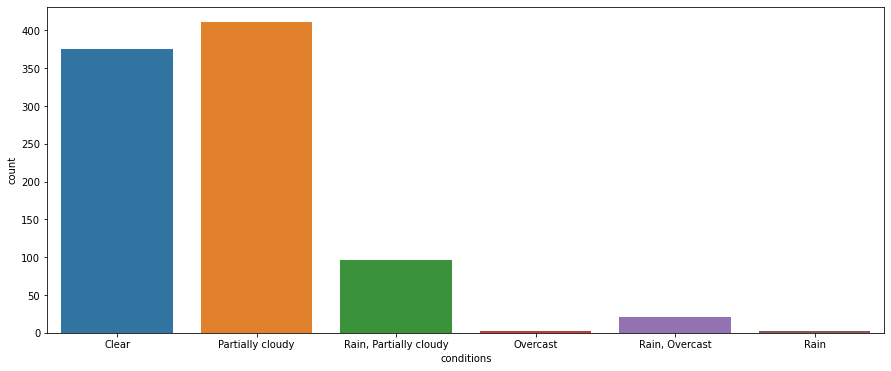

In [50]:
plt.figure(figsize=(15,6))
sns.countplot('conditions', data = data_Lucknow)
plt.show()

In [51]:
data_Lucknow[["humidity","tempmax","tempmin","windspeed"]].describe()

,humidity,tempmax,tempmin,windspeed
count,910.000000,910.000000,910.000000,910.000000
mean,50.001484,38.590989,25.589560,18.230110
std,16.821152,3.905527,3.423608,6.901668
min,17.280000,25.000000,10.000000,3.600000
25%,36.025000,36.000000,23.100000,13.900000
50%,48.650000,39.000000,26.000000,17.700000
75%,61.215000,41.400000,28.000000,22.300000
max,98.430000,48.000000,33.500000,77.800000


In [52]:
weather

City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed
New Delhi,01-04-2021,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.6,22.8
New Delhi,02-04-2021,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4
New Delhi,03-04-2021,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5
New Delhi,04-04-2021,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.0,18.3
New Delhi,05-04-2021,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5
New Delhi,06-04-2021,38.0,22.6,30.4,37.2,22.6,29.5,10.2,30.51,14.8
New Delhi,07-04-2021,36.0,23.4,29.6,34.6,23.4,28.7,9.7,31.69,18.4
New Delhi,08-04-2021,34.9,20.9,27.6,32.6,20.9,26.7,4.4,26.47,15.9
New Delhi,09-04-2021,36.2,17.1,27.7,33.7,17.1,26.6,3.6,25.64,18.4
New Delhi,10-04-2021,36.9,19.4,28.9,34.7,19.4,27.8,3.8,23.01,16.6


In [53]:
weather_Lucknow = weather[weather['City']== 'Lucknow']

In [54]:
weather_Lucknow['humidity'].show()

Materializing SArray

In [55]:
weather_Lucknow['tempmax'].show()

Materializing SArray

In [56]:
weather_Lucknow['tempmin'].show()

Materializing SArray

In [57]:
weather_Lucknow['windspeed'].show()

Materializing SArray

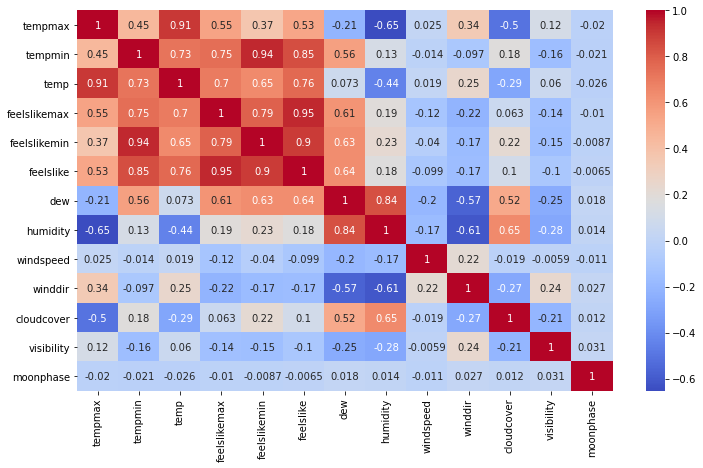

In [58]:
plt.figure(figsize=(12,7))
sns.heatmap(data_Lucknow.corr(), annot=True, cmap ='coolwarm')

In [59]:
df = data_Lucknow.drop(['Date', 'sunrise', 'sunset', 'description'], axis = 1)

In [60]:
df

,City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,Lucknow,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,Clear
1002,Lucknow,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,Clear
1003,Lucknow,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,Clear
1004,Lucknow,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,Clear
1005,Lucknow,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,Lucknow,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,Partially cloudy
12645,Lucknow,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,"Rain, Partially cloudy"
12646,Lucknow,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,Partially cloudy
12647,Lucknow,42.1,32.0,37.1,47.5,34.9,40.9,20.6,39.76,24.1,253.3,30.6,4.4,0.38,Partially cloudy


In [61]:
d1 = df.quantile(0.25)
d2 = df.quantile(0.75)

In [62]:
d1

tempmax         36.000
tempmin         23.100
temp            30.100
feelslikemax    38.300
feelslikemin    23.100
feelslike       31.100
dew             14.700
humidity        36.025
windspeed       13.900
winddir         96.350
cloudcover       7.000
visibility       3.400
moonphase        0.250
Name: 0.25, dtype: float64

In [63]:
d2

tempmax          41.400
tempmin          28.000
temp             34.700
feelslikemax     46.900
feelslikemin     30.600
feelslike        38.900
dew              23.575
humidity         61.215
windspeed        22.300
winddir         251.050
cloudcover       54.300
visibility        4.400
moonphase         0.760
Name: 0.75, dtype: float64

In [64]:
IQR = d2 - d1

In [65]:
IQR

tempmax           5.400
tempmin           4.900
temp              4.600
feelslikemax      8.600
feelslikemin      7.500
feelslike         7.800
dew               8.875
humidity         25.190
windspeed         8.400
winddir         154.700
cloudcover       47.300
visibility        1.000
moonphase         0.510
dtype: float64

In [66]:
df = df[~((df < (d1 - 1.5*IQR)) | (df > (d2 + 1.5*IQR))).any(axis = 1)]

In [67]:
df

,City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,Lucknow,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,Clear
1002,Lucknow,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,Clear
1003,Lucknow,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,Clear
1004,Lucknow,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,Clear
1005,Lucknow,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,Lucknow,43.1,30.5,36.6,47.7,34.7,40.9,21.2,44.01,28.7,243.6,75.1,4.8,0.16,Partially cloudy
12644,Lucknow,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,Partially cloudy
12645,Lucknow,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,"Rain, Partially cloudy"
12646,Lucknow,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,Partially cloudy


In [68]:
weather1 = turicreate.SFrame(df)

In [69]:
weather1

City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir
Lucknow,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8
Lucknow,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4
Lucknow,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2
Lucknow,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.8,18.4,174.8
Lucknow,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.8,9.4,135.5
Lucknow,39.0,22.6,30.9,39.0,22.6,30.7,14.1,37.77,14.8,105.9
Lucknow,38.0,26.0,31.3,40.4,26.0,32.7,18.4,47.66,14.8,103.8
Lucknow,38.3,23.8,30.7,37.7,23.8,30.5,15.6,45.6,16.6,187.5
Lucknow,37.0,22.0,30.4,34.7,22.0,29.1,8.7,27.71,14.8,204.1
Lucknow,38.6,20.6,29.6,36.3,20.6,28.4,6.7,25.98,16.6,186.1


In [70]:
weather1['humidity'].show()
weather1['tempmax'].show()
weather1['tempmin'].show()
weather1['windspeed'].show()

Materializing SArray

Materializing SArray

Materializing SArray

Materializing SArray

In [71]:
df

,City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,Lucknow,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,Clear
1002,Lucknow,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,Clear
1003,Lucknow,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,Clear
1004,Lucknow,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,Clear
1005,Lucknow,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,Lucknow,43.1,30.5,36.6,47.7,34.7,40.9,21.2,44.01,28.7,243.6,75.1,4.8,0.16,Partially cloudy
12644,Lucknow,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,Partially cloudy
12645,Lucknow,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,"Rain, Partially cloudy"
12646,Lucknow,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,Partially cloudy


In [72]:
df = df[df['City'] == 'Lucknow']

In [73]:
df

,City,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,Lucknow,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,Clear
1002,Lucknow,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,Clear
1003,Lucknow,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,Clear
1004,Lucknow,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,Clear
1005,Lucknow,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,Lucknow,43.1,30.5,36.6,47.7,34.7,40.9,21.2,44.01,28.7,243.6,75.1,4.8,0.16,Partially cloudy
12644,Lucknow,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,Partially cloudy
12645,Lucknow,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,"Rain, Partially cloudy"
12646,Lucknow,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,Partially cloudy


In [74]:
df1 = df.drop(['City'], axis = 1)

In [75]:
df1

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,Clear
1002,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,Clear
1003,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,Clear
1004,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,Clear
1005,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,43.1,30.5,36.6,47.7,34.7,40.9,21.2,44.01,28.7,243.6,75.1,4.8,0.16,Partially cloudy
12644,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,Partially cloudy
12645,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,"Rain, Partially cloudy"
12646,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,Partially cloudy


In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
lc = LabelEncoder()
df1["conditions"] = lc.fit_transform(df1["conditions"])

In [96]:
df1.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,0
1002,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,0
1003,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,0
1004,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,0
1005,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,0


In [97]:
y = df1["conditions"].values

In [98]:
df1.head(1246)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,cloudcover,visibility,moonphase,conditions
1001,35.3,17.0,27.0,32.7,17.0,25.9,4.4,26.38,31.7,283.8,0.0,4.4,0.60,0
1002,35.9,17.0,27.3,33.5,17.0,26.3,5.6,27.09,16.6,202.4,0.0,4.3,0.65,0
1003,36.1,18.0,28.4,33.7,18.0,27.3,4.7,24.17,13.0,197.2,0.0,4.3,0.70,0
1004,37.1,17.2,28.0,34.4,17.2,26.9,6.1,27.80,18.4,174.8,0.0,4.3,0.76,0
1005,38.9,18.8,28.8,36.2,18.8,27.9,9.9,33.80,9.4,135.5,9.0,4.3,0.81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,43.1,30.5,36.6,47.7,34.7,40.9,21.2,44.01,28.7,243.6,75.1,4.8,0.16,2
12644,42.1,31.0,36.5,44.7,32.2,38.3,18.3,35.42,25.9,279.6,22.1,4.5,0.21,2
12645,41.1,31.0,34.7,45.2,32.5,37.7,20.3,43.75,22.3,250.8,53.0,4.1,0.27,5
12646,42.1,29.1,35.8,46.4,32.1,39.6,21.1,44.53,19.3,280.9,46.8,4.7,0.33,2


In [99]:
y

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 2, 2, 5,
       0, 2, 0, 0, 0, 5, 0, 0, 2, 5, 2, 2, 2, 2, 0, 2, 2, 2, 5, 5, 2, 2,
       0, 1, 5, 4, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5,
       2, 4, 2, 2, 5, 5, 5, 5, 4, 4, 1, 2, 2, 2, 4, 5, 5, 2, 5, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 5, 2, 5, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 5, 5, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 5, 2, 2, 5, 2, 0, 0, 0,
       0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 0, 2, 5, 0,
       0, 0, 0, 0, 2, 5, 2, 2, 0, 5, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 5, 2, 2, 0, 5, 0, 0, 2, 2, 0, 0,

In [100]:
x = ((df1.loc[:,df1.columns!="conditions"]).astype(int)).values[:,0:]

In [101]:
x

array([[35, 17, 27, ...,  0,  4,  0],
       [35, 17, 27, ...,  0,  4,  0],
       [36, 18, 28, ...,  0,  4,  0],
       ...,
       [41, 31, 34, ..., 53,  4,  0],
       [42, 29, 35, ..., 46,  4,  0],
       [42, 32, 37, ..., 30,  4,  0]])

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [103]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
print("KNN Accuracy: {:.2f}%" .format(knn.score(xtest,ytest)*100))

KNN Accuracy: 85.88%


In [104]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
knn.score(xtest,ytest)

0.8587570621468926

In [106]:
svm = SVC()
svm.fit(xtrain,ytrain)
print("SVM Accuracy: {:.2f}%" .format(svm.score(xtest,ytest)*100))

SVM Accuracy: 85.88%
